In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import logging
from collections import OrderedDict
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm

import sys
sys.path.insert(0, '../helper_functions/')
from nlp_preprocessing import (clean_string_fields, get_top_n_grams, get_word_frequency_table)

# paths
root_path = '../data_cleaned/'
data_path = f'{root_path}/biorxiv_clean.csv'

In [2]:
df = pd.read_csv(root_path + data_path)

In [3]:
for col in ['abstract', 'title']: # 'text', 'bibliography'
    df[col] = df[col].fillna('unknown').apply(clean_string_fields)

In [5]:
freq_table = get_word_frequency_table(df['title'], freq_count=2)

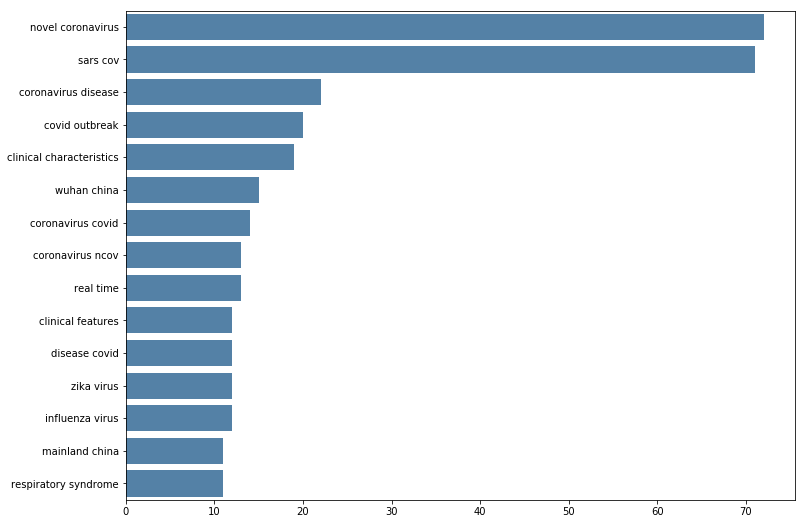

In [4]:
top_n_tri_grams = get_top_n_grams(df['title'], n_count=2)[:15]

x, y = map(list, zip(*top_n_tri_grams))
fig, ax = plt.subplots(figsize=(12,9))
sns.barplot(x = y, y = x, color='steelblue', ax=ax)

In [6]:
import gensim
from nltk import FreqDist, word_tokenize, sent_tokenize
stopwords_en = set(stopwords.words("english"))

In [21]:
def preprocess_news(df, col):
    corpus=[]
    for word in df[col].dropna():
        
        words=[w for w in word_tokenize(word)]
        
        #words=[lemmatizer.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
        
    return corpus

In [22]:
corpus = preprocess_news(df=df, col='title')

In [26]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [27]:
bow_corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1)],
 [(9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1)],
 [(18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1)],
 [(33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1)],
 [(48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1)],
 [(28, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1)],
 [(31, 2),
  (82, 2),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 2),
  (87, 2),
  (88, 2),
  (89, 2),
  (90, 